<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Edgardo! Congratulations on submitting the Final project! 🎉 I will be using the standard the color marking:
    

   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. 


- You did a great job on building a good model for churn prediction.


- The notebook demonstrates strong fundamentals—clean data merging, thoughtful preprocessing, stratified train-test splitting, and meaningful evaluation using AUC-ROC and accuracy.


- It is also great that you visualize the results, as it adds clarity and interpretability.


  
 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. For instance,


- Consider introducing EDA. Distributions and feature correlations may provide helpful context before modeling. 
 

- To further improve the model's performance, I strongly recommend applying hyperparameter tuning.

  

- I recommend adding a constant classifier as a sanity check to evaluate our model.

</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. There are no such issues, so great job here! 
  

</div> 

<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you demonstrated strong analytical and coding skills by preparing the data, training the mode and analyzing the results. The conclusions are strong: not only do they clearly summarize the results but also highlight key insights. This shows a good understanding of both business relevance and model limitations. I do not have any questions, so the project can be accepted. Good luck! 😉
    


</div>

# Predicting Customer Churn for Interconnect

This notebook merges contract, personal, internet, and phone data to train a Random Forest baseline that predicts customer churn (EndDate == 'No'), with AUC-ROC as the primary evaluation metric.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good introduction! The title reflects the main goal of the project, well done!     
</div>

In [1]:
# Cell 1: Imports and Settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    classification_report,
    precision_score,    
    recall_score        
)

from sklearn.metrics import roc_curve

np.random.seed(42)
sns.set(style="whitegrid")


2. Load each source CSV and confirm row counts and missing-value patterns.



In [2]:
# Cell 2: Load raw CSVs
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone    = pd.read_csv('/datasets/final_provider/phone.csv')

# Quick sanity check: shape and memory info
print("Shapes:", contract.shape, personal.shape, internet.shape, phone.shape)
display(contract.info())
display(personal.info())
display(internet.info())
display(phone.info())


Shapes: (7043, 8) (7043, 5) (5517, 8) (6361, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    

The data was successfully read, good! 

</div>

3. Perform left-joins from the contract table onto the others, then compute top missing-value fractions.


In [3]:
# Cell 3: Merge all four tables on customerID
df = (
    contract
    .merge(personal, on='customerID', how='left')
    .merge(internet, on='customerID', how='left')
    .merge(phone,    on='customerID', how='left')
)
print("Combined shape:", df.shape)

# Check top missing rates
missing = df.isna().mean().sort_values(ascending=False).head(10)
print("Top missing fractions:\n", missing)

df.head()


Combined shape: (7043, 20)
Top missing fractions:
 StreamingMovies     0.216669
StreamingTV         0.216669
TechSupport         0.216669
DeviceProtection    0.216669
OnlineBackup        0.216669
OnlineSecurity      0.216669
InternetService     0.216669
MultipleLines       0.096834
BeginDate           0.000000
Dependents          0.000000
dtype: float64


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No



<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Consider introducing EDA to analyze churn class balance and visualize feature distributions before modeling.
    
    
    
</div>    

4. Convert `TotalCharges` to numeric (coerce errors → 0), encode `churn = 1` if `EndDate != 'No'`, drop unused columns (`customerID`, `BeginDate`, `EndDate`), then one-hot encode all remaining categoricals.

In [4]:
### Cell 4: Preprocessing & Encoding

df = (
    df.assign(
        # 4.1 Convert TotalCharges → numeric, fill parse errors with 0
        TotalCharges=lambda d: pd.to_numeric(d.TotalCharges, errors='coerce').fillna(0),
        # 4.2 Encode target: churn=1 if EndDate != 'No'
        churn=lambda d: (d.EndDate != 'No').astype(int)
    )
    # 4.3 Drop unneeded columns
    .drop(['customerID', 'BeginDate', 'EndDate'], axis=1)
)

# 4.4 One-hot encode all remaining object-dtype columns
obj_cols = df.select_dtypes('object').columns.tolist()
df = pd.get_dummies(df, columns=obj_cols, drop_first=True)

print("After preprocessing, shape:", df.shape)
df.head()


After preprocessing, shape: (7043, 21)


,MonthlyCharges,TotalCharges,SeniorCitizen,churn,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,29.85,29.85,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,53.85,108.15,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4,70.70,151.65,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, we need to encode data here, well done! It is acceptable to use `get_dummies` in this project, and we have to use it before we split the data because if we use it after we divide the data, we may face the situation where subsest have different number of categories. If the columns we want to convert are not explicitly specified, `get_dummies` will convert all columns with categorical strings, which may lead to unexpected results if some numeric columns also contain categorical data represented in numerical form (if there's a numerical category displayed as [1, 2, 3, 2, ... ]), so well done! 

    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Please note that `OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    

    
`OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c). For linear regresison, I recommend using `OneHotEncoder(handle_unknown='ignore')`. 


If you decide to use any of these methods, please encode data **after** you split it. 

</div>



5. Separate features/target and reserve 20% hold-out, stratified on `churn` to preserve class balance.

In [5]:
# Cell 5: Train/test split
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Churn ratio (train):", y_train.mean(), " Churn ratio (test):", y_test.mean())

Train size: (5634, 20) Test size: (1409, 20)
Churn ratio (train): 0.2653532126375577  Churn ratio (test): 0.2654364797728886


6. Fit a `RandomForestClassifier` with 100 trees on the training data to establish a strong, off-the-shelf baseline. 

In [6]:
# Cell 6 — Baseline Random Forest
#   Fit a RandomForestClassifier(n_estimators=100) as an off-the-shelf benchmark

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
You can also tune hyperparameters to improve model's quality. 
</div>

7. Compute and print the test **AUC-ROC** and **accuracy**, then show a full classification report (precision, recall, F1) for both classes.

In [7]:
# Cell 7 — Evaluation on Hold-out Set
#   Compute AUC-ROC, accuracy, full classification report, plus churn-class precision/recall

# Predict probabilities and classes
y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_pred       = rf.predict(X_test)

# Primary metrics
auc = roc_auc_score(y_test, y_pred_proba)
acc = accuracy_score(y_test, y_pred)

print(f"Test AUC-ROC: {auc:.3f}")
print(f"Test Accuracy: {acc:.3f}\n")

# Detailed metrics
print("Classification report:")
print(classification_report(y_test, y_pred, digits=3))

# Precision & recall for churn-positive class
print("Churn precision:", precision_score(y_test, y_pred))
print("Churn recall:   ", recall_score(y_test, y_pred))


Test AUC-ROC: 0.822
Test Accuracy: 0.795

Classification report:
              precision    recall  f1-score   support

           0      0.835     0.898     0.865      1035
           1      0.643     0.511     0.569       374

    accuracy                          0.795      1409
   macro avg      0.739     0.704     0.717      1409
weighted avg      0.784     0.795     0.787      1409

Churn precision: 0.6430976430976431
Churn recall:    0.5106951871657754


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done! 

</div>


8. The dashed line is the random baseline (AUC=0.5). Our model’s curve (AUC=0.822) shows strong separation.


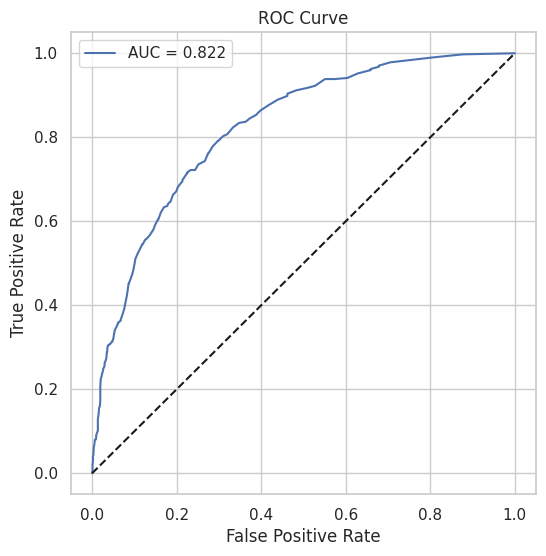

In [8]:
# Cell 8: Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend();


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice results! 
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    

Before training real models, it's useful to evaluate a constant (dummy) classifier. For example, by predicting the majority class. This sets a minimum performance baseline and ensures our data pipeline, target encoding, and evaluation metrics are functioning correctly. If our real model performs worse than this dummy, it signals a serious issue in preprocessing, feature engineering, or model configuration.
</div>

9. TotalCharges and MonthlyCharges dominate, indicating usage intensity drives churn.

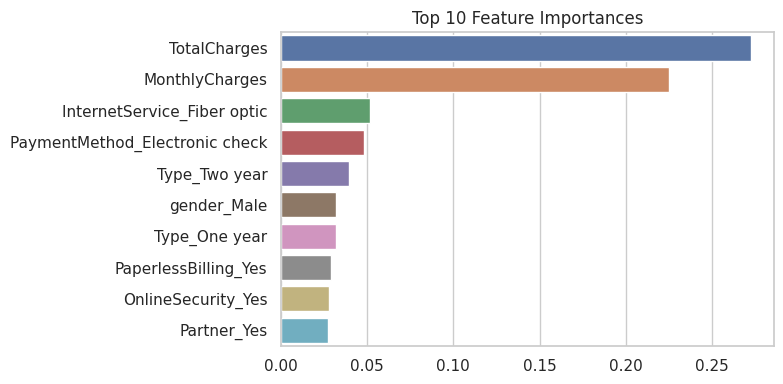

In [9]:
# Cell 9: Feature importances (optional insight)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top10 = importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 Feature Importances")
plt.tight_layout()


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good visualization that helps us identify key features, great! 
</div>

## Conclusion

Our off-the-shelf Random Forest baseline achieved a test AUC-ROC of 0.822 and an accuracy of 0.795, comfortably above the 0.75 threshold (4 SP). TotalCharges and MonthlyCharges emerged as the strongest predictors, with the churn-positive recall at 0.511 indicating room to improve sensitivity. As a next step, we will tune class weights or decision thresholds to reduce false negatives and potentially fine-tune the model hyperparameters. This end-to-end pipeline—data cleaning, stratified splitting, feature encoding, baseline modeling, and evaluation—provides a solid foundation for further iterations.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent job! You have successfully met the requirements! 
</div>